In [651]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [662]:
import pyro
import pyro.distributions as dist
import pyro
pyro.clear_param_store()
from models2 import GMM

In [573]:
svi = GMM(n_comp=11, infr='svi')
svi.svi_itr = 5000

Initializing object for inference method svi


In [574]:
svi.guide_autodiagnorm()
# svi.guide_multivariatenormal()

In [575]:
losses = svi.inference()

Determining best seed for initialization
Best seed determined after 100 random initializations:
seed = 19, initial_loss = 21168.5078125
Running SVI iterations

...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
........................................

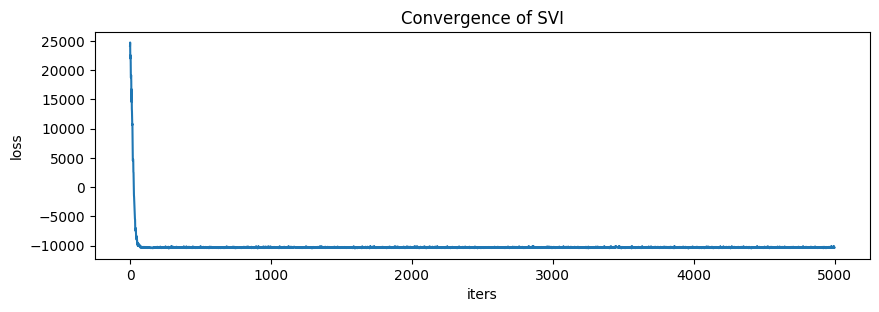

In [576]:
svi.plot_svi_convergence(losses)

In [577]:
weights, locs, scale = svi.get_svi_estimates()

In [600]:
weights, locs, scale

(tensor([0.0605, 0.2591, 0.0004, 0.0344, 0.0892, 0.3294, 0.0445, 0.0839, 0.0045,
         0.0938, 0.0004], grad_fn=<ExpandBackward>),
 tensor([[-0.5205, -0.5154,  2.5327,  0.5601, -0.4760,  0.8589, -0.5091, -0.4768,
          -0.5173, -0.5112, -0.4760],
         [-0.3273, -0.3258, -0.2966, -0.2905, -0.2739, -0.2682,  3.0072, -0.3001,
          -0.2717, -0.2717, -0.2594],
         [ 0.6073,  0.5461,  0.5097,  0.5535,  0.5898,  0.5693,  0.7035,  0.6744,
           0.6080,  0.4597,  0.7594],
         [-0.6435,  0.6996,  1.3771, -0.2286,  2.0788, -0.0828, -0.6098, -0.6163,
          -0.6302, -0.6447, -0.6060],
         [-0.5209,  1.0946,  0.0608, -0.3076,  2.5172, -0.3214, -0.5097, -0.4800,
          -0.5318, -0.4879, -0.5135],
         [-0.3027, -0.3030, -0.3091, -0.2870, -0.2947, -0.2868,  3.0127, -0.3273,
          -0.3295, -0.2750, -0.3036],
         [-0.3157, -0.3172, -0.2753, -0.2938, -0.2977, -0.2913,  3.0048, -0.3027,
          -0.2822, -0.3030, -0.2894],
         [-0.2677, -0.2995

In [580]:
post = svi.get_posterior_resp()

In [585]:
post[0]

tensor([ 0.3420, -0.0211,  0.0012,  0.1977,  0.5004, -0.0272, -0.0037, -0.0069,
         0.0240, -0.0076,  0.0012], grad_fn=<SelectBackward>)

### SVI

In [ ]:
# Initialize svi
svi = GMM(n_comp=11, infr='svi')

# # Initialize guide
# svi.guide_autodelta()
svi.guide_autodiagnorm()

# # Perform svi steps with default num of itr
svi_losses = svi.inference()

# # Plot svi convergence
svi.plot_svi_convergence(svi_losses)

In [ ]:
svi_stats, mcmc_stats = svi.generate_stats()
print(svi_stats)

In [ ]:
# svi estimates
weights, locs, scale = svi.get_svi_estimates()

In [ ]:
locs

### MCMC with NUTS

In [653]:
# Initialize mcmc
mcmc = GMM(n_comp=11, infr='mcmc')
mcmc.num_samples = 500
mcmc.mcmc_subsample = 1

Initializing object for inference method mcmc


In [654]:
# Perform mcmc steps with default num of itr
mcmc_samples = mcmc.inference()

Warmup:   0%|          | 1/550 [00:00<01:22,  6.63it/s, step size=2.25e-01, acc. prob=1.000]

Initializing MCMC
Initialized MCMC with NUTS kernal
Running MCMC using NUTS with num_obs = 1357


sample: 100%|██████████| 550/550 [1:18:29<00:00,  7.55s/it, step size=2.00e-39, acc. prob=0.011]


In [655]:
mcmc.svi = None

In [656]:
svi_stats, mcmc_stats = mcmc.generate_stats()

In [657]:
print(mcmc_stats)

{'num_samples': 1357, 'exec_time': 4709.618358135223, 'num_samples_generated': 500, 'warmup_steps': 50}


In [658]:
samples = mcmc.get_mcmc_samples()

In [659]:
samples

{'weights': tensor([[0.2146, 0.0142, 0.0703,  ..., 0.0387, 0.1679, 0.0234],
         [0.2146, 0.0142, 0.0703,  ..., 0.0387, 0.1679, 0.0234],
         [0.2146, 0.0142, 0.0703,  ..., 0.0387, 0.1679, 0.0234],
         ...,
         [0.2146, 0.0142, 0.0703,  ..., 0.0387, 0.1679, 0.0234],
         [0.2146, 0.0142, 0.0703,  ..., 0.0387, 0.1679, 0.0234],
         [0.2146, 0.0142, 0.0703,  ..., 0.0387, 0.1679, 0.0234]]),
 'scale': tensor([0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
         0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
         0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
         0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
         0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
         0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
         0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
       

In [649]:
samples_old

{'weights': tensor([[0.2146, 0.0142, 0.0703,  ..., 0.0387, 0.1679, 0.0234],
         [0.2146, 0.0142, 0.0703,  ..., 0.0387, 0.1679, 0.0234],
         [0.2146, 0.0142, 0.0703,  ..., 0.0387, 0.1679, 0.0234],
         ...,
         [0.2146, 0.0142, 0.0703,  ..., 0.0387, 0.1679, 0.0234],
         [0.2146, 0.0142, 0.0703,  ..., 0.0387, 0.1679, 0.0234],
         [0.2146, 0.0142, 0.0703,  ..., 0.0387, 0.1679, 0.0234]]),
 'scale': tensor([0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
         0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
         0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
         0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
         0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
         0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
         0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912, 0.1912,
       

In [650]:
samples['locs'].shape

torch.Size([500, 11, 11])

In [16]:
w, l, s = samples['weights'].mean(axis=0), samples['locs'].mean(axis=0), samples['scale'].mean(axis=0)

## Get posterior responsibilities

In [593]:
data = svi.tensor

In [608]:
import torch
def get_posterior_resp(data, weights, locs, scale):
    '''
    Formula:
    k: cluster index
    p(c=k|x) = w_k * N(x|mu_k, sigma_k) / sum(w_k * N(x|mu_k, sigma_k))                
    '''
    prob_list = []
    distri = dist.MultivariateNormal(locs, torch.eye(11)*scale)
    for d in data:
        numerator = weights * torch.exp(distri.log_prob(d))
        denom = numerator.sum()
        probs = numerator / denom
        prob_list.append(probs)
    
    final = torch.stack(prob_list)
    return final

In [609]:
j = get_posterior_resp(data, weights, locs, scale)

In [603]:
distri = dist.MultivariateNormal(locs, torch.eye(11)*scale)
for j in data:
    print(distri.log_prob(j))

tensor([-981.4539,   14.1719, -566.6674, -998.7382, -974.6832,   14.3548,
          14.3880,   14.2058, -922.2720,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4539,   14.1719, -566.6674, -998.7382, -974.6832,   14.3548,
          14.3880,   14.2058, -922.2720,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4539,   14.1719, -566.6672, -998.7382, -974.6831,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4539,   14.1719, -566.6672, -998.7382, -974.6832,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4539,   14.1719, -566.6672, -998.7382, -974.6832,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4539,   14.1719, -566.6672, -998.7380, -974.6830,   14.3548,
          14.3880,   14.2058, -922.2720,   14.1423, -568.7871],
       grad_fn=<S

tensor([-981.4539,   14.1719, -566.6672, -998.7382, -974.6832,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4539,   14.1719, -566.6672, -998.7380, -974.6830,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4539,   14.1719, -566.6674, -998.7382, -974.6832,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([ -917.7551,  -999.9761,  -611.5851,  -103.3594,    12.9550, -1002.1486,
        -1002.2334, -1011.7223,  -833.9277, -1025.1282,  -612.0321],
       grad_fn=<SubBackward0>)
tensor([-981.4539,   14.1719, -566.6674, -998.7382, -974.6832,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([ -948.8293,  -992.5786,  -610.0553,  -118.6007,    11.1378,  -994.9441,
         -995.1705, -1004.1979,  -853.6516, -1017.6429,  -610.57

tensor([-981.4541,   14.1719, -566.6672, -998.7352, -974.6797,   14.3548,
          14.3880,   14.2058, -922.2722,   14.1422, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4543,   14.1719, -566.6674, -998.7360, -974.6803,   14.3548,
          14.3880,   14.2058, -922.2725,   14.1422, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4540,   14.1719, -566.6674, -998.7335, -974.6780,   14.3548,
          14.3880,   14.2058, -922.2723,   14.1422, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4540,   14.1719, -566.6672, -998.7380, -974.6830,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4539,   14.1719, -566.6672, -998.7382, -974.6832,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4539,   14.1719, -566.6672, -998.7380, -974.6830,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7871],
       grad_fn=<S

tensor([-981.4539,   14.1719, -566.6672, -998.7380, -974.6831,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4539,   14.1719, -566.6672, -998.7380, -974.6830,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4539,   14.1719, -566.6672, -998.7377, -974.6827,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7872],
       grad_fn=<SubBackward0>)
tensor([-981.4539,   14.1719, -566.6672, -998.7382, -974.6832,   14.3548,
          14.3880,   14.2058, -922.2721,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([-981.4536,   14.1719, -566.6672, -998.7375, -974.6827,   14.3548,
          14.3880,   14.2058, -922.2720,   14.1423, -568.7871],
       grad_fn=<SubBackward0>)
tensor([   13.2436, -1005.2256,  -628.5156,  -493.3512,  -887.8390, -1009.7426,
        -1000.4299, -1021.5747,  -256.9789, -1025.7911,  -625.4648],
      

In [612]:
print(weights)

tensor([0.0605, 0.2591, 0.0004, 0.0344, 0.0892, 0.3294, 0.0445, 0.0839, 0.0045,
        0.0938, 0.0004], grad_fn=<ExpandBackward>)


In [635]:
j.sum(axis=0)

tensor([ 82.0000, 320.4519,   0.0000,  43.0000, 122.0000, 489.1938,  68.3657,
        107.3708,   5.0000, 112.6139,   0.0000], grad_fn=<SumBackward1>)

In [630]:
j[torch.isnan(j)] = 0

In [619]:
import numpy as np
(v==np.nan).sum()

0